In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
data = pd.read_csv('train.csv')

In [65]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [68]:
def init_params():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1, b1, W2, b2
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [73]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ",get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [74]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[7 3 7 ... 7 7 5] [9 5 0 ... 4 6 7]
Accuracy:  0.04670731707317073
Iteration:  10
[7 0 0 ... 7 8 7] [9 5 0 ... 4 6 7]
Accuracy:  0.3349756097560976
Iteration:  20
[7 0 0 ... 7 6 7] [9 5 0 ... 4 6 7]
Accuracy:  0.42153658536585364
Iteration:  30
[7 0 0 ... 7 6 7] [9 5 0 ... 4 6 7]
Accuracy:  0.5358536585365854
Iteration:  40
[9 3 0 ... 7 6 7] [9 5 0 ... 4 6 7]
Accuracy:  0.6783902439024391
Iteration:  50
[9 3 0 ... 9 6 7] [9 5 0 ... 4 6 7]
Accuracy:  0.7564634146341463
Iteration:  60
[9 3 0 ... 9 6 7] [9 5 0 ... 4 6 7]
Accuracy:  0.7838536585365854
Iteration:  70
[9 3 0 ... 9 6 7] [9 5 0 ... 4 6 7]
Accuracy:  0.8004146341463415
Iteration:  80
[9 3 0 ... 9 6 7] [9 5 0 ... 4 6 7]
Accuracy:  0.8145365853658536
Iteration:  90
[9 3 0 ... 9 6 7] [9 5 0 ... 4 6 7]
Accuracy:  0.8255121951219512
Iteration:  100
[9 3 0 ... 9 6 7] [9 5 0 ... 4 6 7]
Accuracy:  0.8342195121951219
Iteration:  110
[9 5 0 ... 9 6 7] [9 5 0 ... 4 6 7]
Accuracy:  0.8413414634146341
Iteration:  120
[9 5 0 ..

In [75]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [82]:
dev_predictions = make_predictions(X_dev , W1 , b1 , W2 , b2)
get_accuracy(dev_predictions, Y_dev)

[6 1 9 8 4 4 6 5 5 1 0 7 7 8 6 9 8 3 1 0 9 4 4 4 5 3 1 2 7 8 8 9 6 4 4 7 4
 0 6 1 8 9 1 4 4 5 2 7 3 1 2 7 9 4 6 9 4 0 7 0 7 9 4 1 6 8 0 9 2 1 6 1 4 8
 8 7 1 3 3 1 1 6 6 1 4 5 3 9 4 6 1 5 9 4 6 5 2 3 9 2 2 2 0 3 0 5 3 2 6 2 5
 8 7 4 6 4 7 9 3 0 0 5 4 0 8 3 6 4 3 9 8 5 0 1 9 0 4 8 7 4 7 0 7 2 4 9 2 9
 5 6 3 0 2 2 6 9 4 6 8 8 3 7 5 9 4 8 3 5 1 4 9 6 5 2 3 2 0 6 1 6 5 0 6 8 5
 4 2 3 8 1 4 2 9 5 7 1 9 9 6 7 7 3 2 0 0 5 7 5 6 2 3 3 3 6 9 8 8 7 7 2 2 7
 9 6 4 1 0 9 0 4 1 3 8 1 6 4 5 6 7 4 6 4 0 6 4 0 1 4 1 2 1 0 8 8 4 6 7 3 7
 1 2 6 6 4 7 0 0 7 7 4 4 6 0 5 0 3 2 1 4 0 4 7 0 3 7 4 1 6 1 7 9 3 3 0 8 8
 7 1 8 9 7 9 2 2 2 5 2 3 2 6 3 0 4 8 8 5 0 1 1 9 3 5 3 7 5 9 2 8 4 6 9 2 1
 8 7 0 4 7 0 6 5 2 3 6 4 3 0 5 6 9 0 8 4 9 7 3 4 1 6 1 9 8 4 1 8 1 8 3 9 7
 7 9 8 5 1 8 2 9 2 2 1 9 6 5 4 2 0 3 3 8 9 9 9 3 6 6 1 8 7 3 5 5 5 8 2 9 4
 8 6 7 6 6 4 6 9 3 2 9 0 8 6 0 0 2 3 3 6 1 5 5 7 3 0 7 0 2 3 3 1 1 5 6 8 5
 6 9 0 7 2 9 4 3 2 7 0 1 6 9 7 6 2 1 3 0 6 3 2 4 7 9 9 7 3 6 8 8 3 1 9 3 9
 2 2 2 9 5 1 4 0 1 3 1 2 

0.902

Prediction:  [0]
Label:  0


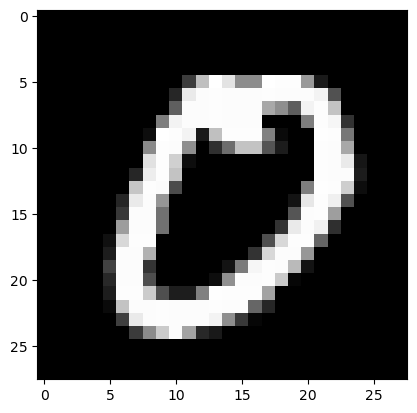

In [76]:
test_prediction(10,W1,b1,W2,b2)

Prediction:  [0]
Label:  0


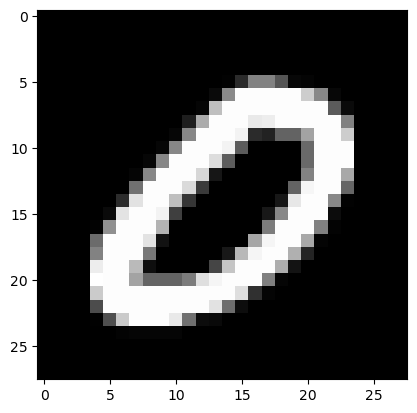

In [77]:
test_prediction(2,W1,b1,W2,b2)

Prediction:  [6]
Label:  6


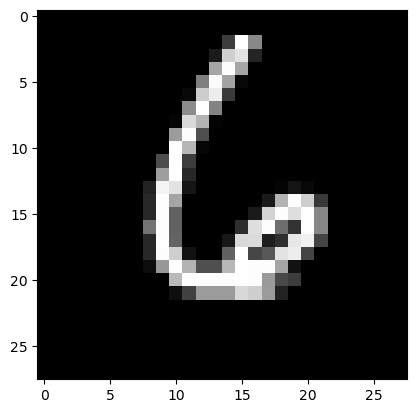

In [78]:
test_prediction(108,W1,b1,W2,b2)

Prediction:  [8]
Label:  8


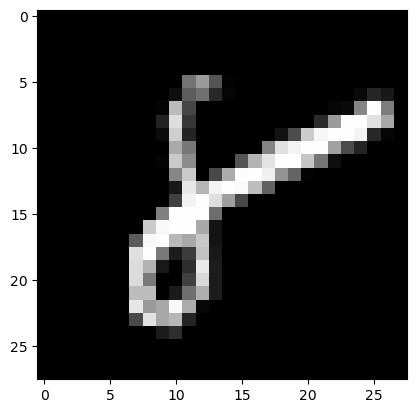

In [79]:
test_prediction(103,W1,b1,W2,b2)

Prediction:  [6]
Label:  6


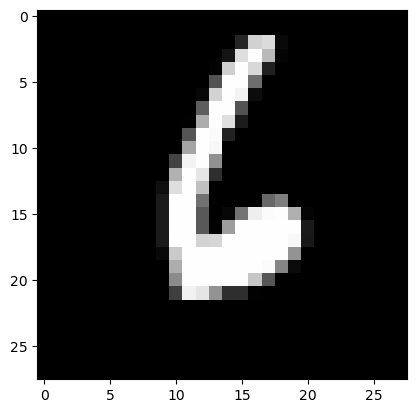

In [80]:
test_prediction(106,W1,b1,W2,b2)

Prediction:  [1]
Label:  3


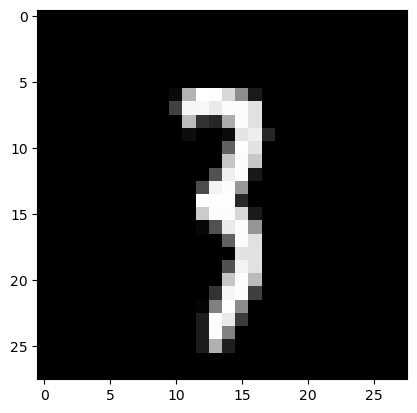

In [81]:
test_prediction(105,W1,b1,W2,b2)